## Control 1 - P2. Clasificación

contestado por Diego Avendaño

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_validate 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve 
from sklearn.pipeline import Pipeline

## Importar y explorar datos

1.- Importe los datos e identifique la respuesta de interés

In [108]:
data = pd.read_csv("Breast_GSE45827.csv")
data

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


Como podemos identificar, la respuesta de interés es type, ya que nos indica el tipo de cáncer de mamas.

2.- Verifique los tipos de datos, descríbalos y vea si es que existen valores nulos -> Observación: Sólo describa, ya que son muchas columnas.

In [109]:
data.dtypes

samples              int64
type                object
1007_s_at          float64
1053_at            float64
117_at             float64
                    ...   
AFFX-ThrX-5_at     float64
AFFX-ThrX-M_at     float64
AFFX-TrpnX-3_at    float64
AFFX-TrpnX-5_at    float64
AFFX-TrpnX-M_at    float64
Length: 54677, dtype: object

In [110]:
data.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,160.668874,10.338901,7.631910,6.224885,7.339248,3.185252,7.310240,5.323484,4.714095,7.787712,...,12.359605,11.823386,14.018193,13.773030,7.621929,5.699042,6.185605,2.918774,3.624008,3.173868
std,45.431226,0.613445,0.706464,0.645435,0.330827,0.158909,0.642091,0.294513,0.308550,1.648260,...,0.318436,0.369859,0.253870,0.290556,0.857777,0.860841,0.953867,0.093126,0.145394,0.101907
min,84.000000,7.505488,5.855968,4.763602,6.632206,2.760583,5.455736,4.646131,3.946065,3.866030,...,11.650564,10.939760,13.419083,13.191191,5.729767,4.326227,4.301471,2.733497,3.299401,2.937393
25%,121.500000,10.103030,7.166075,5.798087,7.105841,3.075873,6.874504,5.131931,4.466260,6.804510,...,12.149550,11.592631,13.807282,13.523011,6.884862,4.967515,5.336542,2.861549,3.532740,3.109767
50%,159.000000,10.416819,7.531673,6.235074,7.333426,3.187703,7.417113,5.274663,4.662957,7.912255,...,12.321900,11.830756,14.002497,13.740376,7.795425,5.489450,6.209136,2.911734,3.615106,3.163205
75%,200.500000,10.735117,8.053832,6.612291,7.513084,3.280416,7.760806,5.456686,4.941337,8.887997,...,12.527235,12.021728,14.232589,14.028020,8.195458,6.449022,7.046721,2.961270,3.698539,3.229561
max,238.000000,11.675109,9.627008,8.364749,8.374055,3.611630,8.569296,6.360765,5.893006,11.710498,...,13.509037,13.119966,14.622678,14.482744,10.291243,8.112206,9.121638,3.322275,4.160823,3.451855


3.- Asigne las variables X e y como las features y respuesta respectívamente. Separe sus datos en train
y test

In [111]:
y = data.type #Dejemos en la variable X las features
X = data.drop(columns="type") #Y en y a la respuesta (type)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y) #Separamos los datos en conjuntos de training y testing

4.- Haga un countplot de las respuestas. ¿El dataset se encuentra balanceado o desbalanceado?

<Axes: xlabel='type', ylabel='count'>

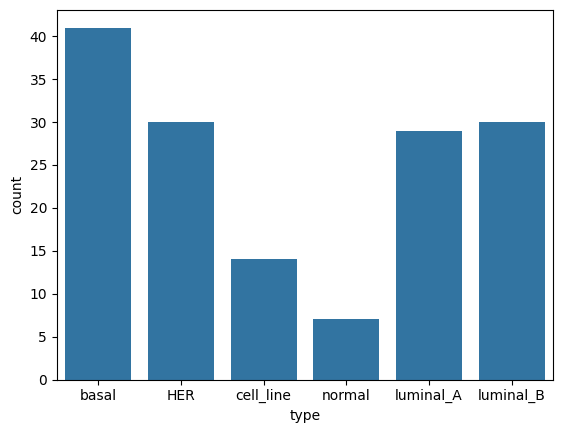

In [113]:
sns.countplot(data, x="type")

El dataset se encuentra desbalanceado.

## Reducción de dimensionalidad

1.- Utilizando los datos de entrenamiento: Realice un PCA con 50 componentes principales y muestre
un gráfico de elbow

In [114]:
ss = StandardScaler()
X = ss.fit_transform(X) #Normalizar los datos

In [115]:
pca = PCA(50) #Instanciate PCA object with N_components = 50
pca.fit(X) #Ajustar el PCA a los datos
pca.explained_variance_ratio_


array([0.11181075, 0.10186105, 0.05223194, 0.03383904, 0.03293234,
       0.02855815, 0.02210766, 0.01850885, 0.01529892, 0.01288198,
       0.01236049, 0.0109382 , 0.01035898, 0.00998738, 0.00914495,
       0.00882964, 0.00858604, 0.0084624 , 0.00816112, 0.00812417,
       0.00784012, 0.00749368, 0.00742112, 0.00720918, 0.0069791 ,
       0.00692285, 0.00667077, 0.00649078, 0.0064402 , 0.00625693,
       0.00613403, 0.00606568, 0.00584451, 0.00579076, 0.00572888,
       0.00557321, 0.00539815, 0.00534494, 0.0053232 , 0.00515179,
       0.00505874, 0.00501671, 0.00495474, 0.00481557, 0.00470067,
       0.00460568, 0.00457338, 0.00451569, 0.00439798, 0.00434318])

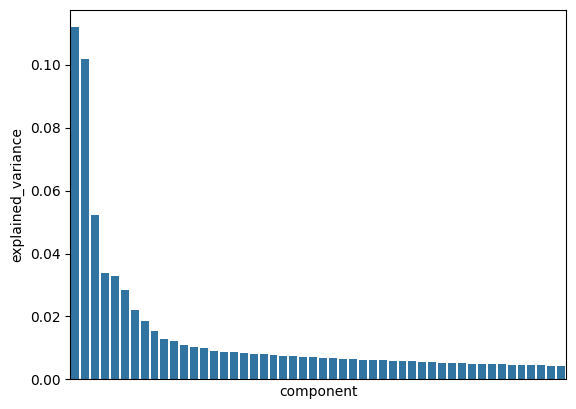

In [116]:
exp_variance = pd.DataFrame(pca.explained_variance_ratio_) #Gets explained variance
exp_variance["component"] = exp_variance.index + 1 #Assign a PC number
exp_variance = exp_variance.rename(columns={0: "explained_variance"})
sns.barplot(exp_variance, x="component", y = "explained_variance") #Plot explained variance
plt.xticks([]) #Drops xticks
plt.show() #Display


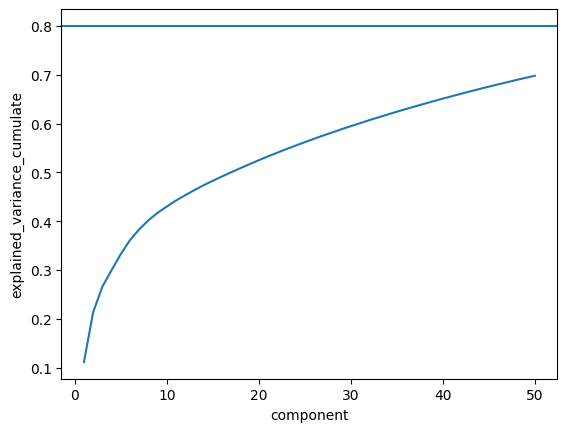

In [117]:
exp_variance["explained_variance_cumulate"] = exp_variance["explained_variance"].cumsum() #Cummulative sum
sns.lineplot(exp_variance, x = "component", y="explained_variance_cumulate") #Plots
plt.axhline(0.8)  #Plots line at 80% of variance
plt.show() #Display

2.- Le interesa explicar el 80% de la varianza, ¿con cuantos componentes se quedará?

Con todos, ya que no hay ningun componente sobre el 80%

3.- Con los datos de entrenamiento, reajuste su PCA para utilizar los componentes seleccionados. Transforme
los datos de entrenamiento y testeo utilizando estos componentes

In [118]:
exp_variance_sample = exp_variance[exp_variance.explained_variance_cumulate <= 0.8] #Selects lower than 80%
num_components = exp_variance_sample.shape[0] #Obtains number of rows (components to use)
num_components

50

In [119]:
pca = PCA(num_components) #New PCA with n_components
X = pca.fit_transform(X) #Transform data
X.shape

(151, 50)

4.- Visualice los primeros 2 componentes en un scatterplot, coloreando según la etiqueta.

<Axes: xlabel='0', ylabel='1'>

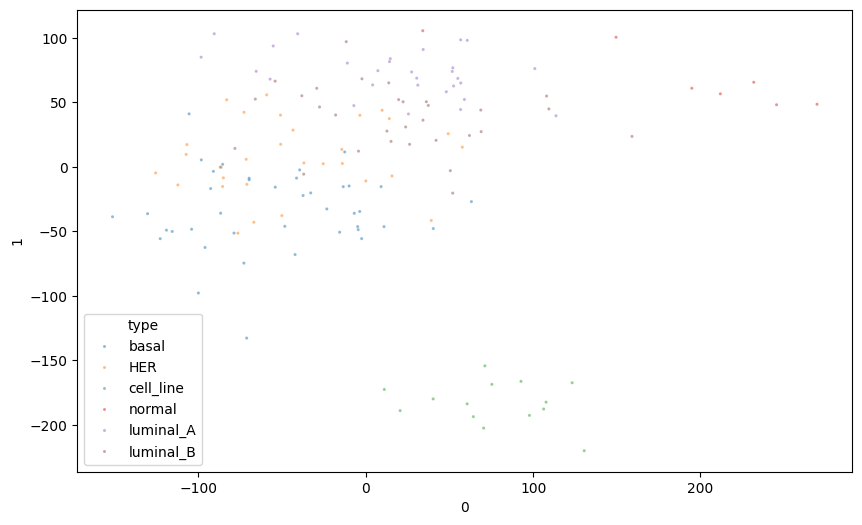

In [120]:
X = pd.DataFrame(X) #Dataframe transformed
plt.figure(figsize=(10,6)) #Set image size
sns.scatterplot(X, x=0, y=1, hue=y.astype(str), alpha=0.5, s=5) #First 2 components, colored by label.

5.- ¿Qué ventajas proporciona reducir la dimensionalidad de un problema?

Reduce el tiempo de computación y espacio de almacenamiento. Necesita menos parámetros para entrenar los modelos, por lo que será menos propenso al overfitting. Además, la correlación sera nula entre las nuevas features, por tanto, independientes entre si. De esta forma eliminamos redundancia.

6.- ¿Qué propiedad deben cumplir ciertos vectores para considerarse componentes principales?

Deben ser vectores propios, es decir, la propiedad de que conservan su dirección cuando se aplica una transformación lineal (mult. matricial).

7.- ¿Qué función maximizan los vectores de componentes principales? ¿Cuál minimizan?

Maximizan la varianza. Minimizan el reconstruction error.

8.- ¿Cuáles son las dos descomposiciones matriciales con las que se puede construir un PCA?

Eigen decomposition y Singular value decomposition (SVD).

## Clasificación

1.- Entrene un modelo de regresión logística con los datos de entrenamiento transformados por el PCA.
Ajuste utilizando cross validation, reporte la media y desviación estandar

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Dividir los datos en train y test

In [122]:
cv_roc = cross_validate(lr, X_train, y_train, cv=5, scoring="roc_auc_ovr")["test_score"] #Validacion cruzada de 5 folds
cv_roc.mean(), cv_roc.std() #Media de la validacion cruzada

(np.float64(0.994445563800569), np.float64(0.007573199305840305))

2.- Re entrene el modelo con todos los datos de entrenamiento y realice las predicciones correspondientes
con el dataset de testeo transformado

In [128]:
y_pred = lr.predict(X_test) #Valores totalmente nuevos
y_prob = lr.predict_proba(X_test) #Predict probability
print(y_test, y_pred)

49           HER
137    luminal_B
31         basal
65           HER
124    luminal_B
95     luminal_A
33         basal
103    luminal_A
35         basal
143    luminal_B
70           HER
97     luminal_A
11         basal
14         basal
91        normal
21         basal
107    luminal_A
139    luminal_B
29         basal
32         basal
102    luminal_A
76     cell_line
104    luminal_A
112    luminal_A
123    luminal_B
113    luminal_A
78     cell_line
75     cell_line
73     cell_line
45           HER
20         basal
Name: type, dtype: object ['HER' 'luminal_B' 'basal' 'basal' 'luminal_B' 'luminal_A' 'basal'
 'luminal_A' 'basal' 'luminal_B' 'HER' 'luminal_B' 'basal' 'basal'
 'normal' 'HER' 'luminal_A' 'luminal_B' 'basal' 'basal' 'luminal_B'
 'cell_line' 'luminal_A' 'luminal_B' 'luminal_B' 'luminal_A' 'cell_line'
 'cell_line' 'cell_line' 'HER' 'basal']


3.- Prediga las probabilidades con el dataset de testeo transformado

In [124]:
y_prob

array([[9.96311789e-01, 1.42942131e-03, 4.76744228e-04, 1.10930123e-03,
        9.30696551e-05, 5.79674892e-04],
       [8.03832629e-05, 4.35481874e-10, 4.31170519e-07, 9.82737742e-06,
        9.99906679e-01, 2.67898669e-06],
       [3.57802831e-05, 9.99708002e-01, 4.86763206e-05, 6.23872441e-07,
        4.22991089e-06, 2.02687458e-04],
       [7.09533263e-02, 9.07005403e-01, 1.36038579e-03, 9.90344986e-04,
        3.25272420e-03, 1.64378156e-02],
       [9.74907105e-07, 3.92677382e-07, 2.36172567e-05, 4.35707862e-03,
        9.95500083e-01, 1.17853433e-04],
       [2.13357645e-05, 3.11041713e-08, 3.26261808e-06, 9.99673422e-01,
        2.93371881e-04, 8.57688307e-06],
       [1.50194242e-04, 9.99710497e-01, 1.07867792e-04, 1.05039893e-05,
        2.33190837e-08, 2.09134322e-05],
       [3.26368879e-07, 6.35730911e-08, 1.01774150e-05, 9.99817266e-01,
        3.68608804e-05, 1.35305289e-04],
       [2.34164534e-06, 9.99996163e-01, 7.01453147e-07, 2.79306373e-07,
        3.63518774e-12, 

4.- ¿Cual es la loss function utilizada en el modelo lineal de clasificación?

En el modelo lineal de clasificación se usa la loss function llamada Cross Entropy.

5.- Nombre los 4 pasos para realizar una estimación de Maximum Likelihood

- 1.- Multiplicar likelihood.
- 2.- Aplicar -log o -ln.
- 3.- Transformar multiplicaciones (epitatorias) a sumatorias.
- 4.- Derivar e igualar a cero.

## Interpretación

1.- Reporte las métricas de clasificación con classification report.

In [130]:
lr = LogisticRegression(max_iter=1000) #Crear un objeto de regresion logistica
lr.fit(X_train, y_train) #Ajustar el modelo a los datos de train
y_pred1 = lr.predict(X_train) #Predecir los datos de test
print(classification_report(y_train, y_pred1)) #Mostrar el reporte de clasificacion

              precision    recall  f1-score   support

         HER       1.00      1.00      1.00        26
       basal       1.00      1.00      1.00        32
   cell_line       1.00      1.00      1.00        10
   luminal_A       1.00      1.00      1.00        21
   luminal_B       1.00      1.00      1.00        25
      normal       1.00      1.00      1.00         6

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



2.- Muestre una matriz de confusión de sus resultados. ¿Qué errores está cometiendo su modelo?

<Axes: >

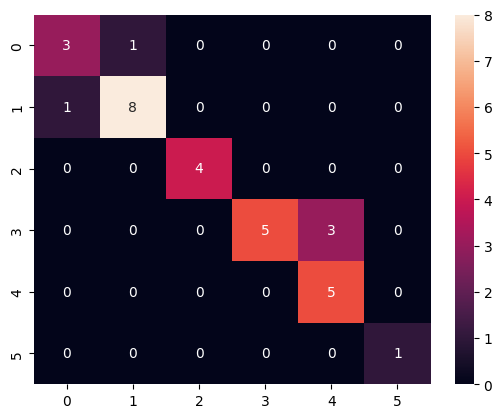

In [133]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True) #Plots heatmap

Mi modelo no está cometiendo demasiados errores, ya que su diagonal principal representa los aciertos (verdaderos positivos y verdaderos negativos), mientras que dentro de los desaciertos, solo se cuentan 5.

3.- ¿Qué desventaja tiene utilizar el accuracy como métrica en este tipo de problemas?

Tiene la desventaja de que necesita un número único para comparar modelos.

4.- Considerando que es más importante detectar una enfermedad o subtipo, que no detectarlo, ¿qué
métrica es la mas indicada?

Recall es la métrica más indicada, ya que esta es útil cuando se deben minimizar los falsos
negativos.

5.- En el contexto de las métricas de desempeño, cual es la diferencia ”macro avg” y ”weighted avg”?

"macro avg" simplemente calcula la media de las métricas binarias, asignando el mismo peso a cada clase. Mientras que, "weighted avg" explica el desequilibrio de clases calculando el promedio de métricas binarias en el que la puntuación de cada clase se pondera según su presencia en la muestra de datos reales.

## Bonus Point

De ejemplos de tareas que podrían resolverse utilizando:
- Aprendizaje supervisado - Clasificación (2 ejemplos)
- Aprendizaje supervisado - Regresión (2 ejemplos)

Las respuestas deben ser originales y no deben haber sido mencionadas en clases o ayudantías.

R:// Creo que usando clasificación, se podrían resolver tareas como identificar el estado de las cerezas en un árbol, a través de algunos parámetros. Con estado me refiero a su madurez o si esta tiene alguna enfermedad, etc. El otro ejemplo va de la mano con esto mismo, ya que se podría usar para poder identificar que partes de una imagen se corresponden con cerezas. Lo cual podría ayudar a la implementación de un conteo en tiempo real.

En el caso de regresión, creo que se podría aplicar para predecir las condiciones de victoria en un combate Pokémon, si se conociesen los datos del oponente asociado a movimientos, habilidades, tipos de los Pokémon, etc. A su vez, otro ejemplo similar, es que se podría utilizar para predecir la estadística base de Velocidad que podría tener un Pokémon, basandose en su tipo elemental u otros atributos.